<a href="https://colab.research.google.com/github/eduardoluisvieira/mackenzie/blob/main/Mineracao-de-Dados/Analise_IPCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Análise preliminar dos dados de índices de IPCA Geral e de Serviços de janeiro de 1992 à janeiro de 2022**



---



In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [ ]:
inflacao = pd.read_csv ('https://raw.githubusercontent.com/eduardoluisvieira/mackenzie/main/STP-inflacao.csv', delimiter=';',decimal=',',encoding='latin1')

In [ ]:
inflacao.head()



,Data,IPCA,IPCA_Servico
0,jan/92,25.94,25.84
1,fev/92,24.32,22.17
2,mar/92,21.40,20.74
3,abr/92,19.93,20.14
4,mai/92,24.86,26.93


In [ ]:
inflacao.describe()

,IPCA,IPCA_Servico
count,361.000000,361.000000
mean,3.071385,3.088864
std,8.548158,8.381942
min,-0.510000,-0.470000
25%,0.300000,0.290000
50%,0.520000,0.490000
75%,0.880000,0.830000
max,47.430000,45.420000


In [ ]:
inflacao.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 361 entries, 0 to 360
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Data          361 non-null    object 
 1   IPCA          361 non-null    float64
 2   IPCA_Servico  361 non-null    float64
dtypes: float64(2), object(1)
memory usage: 8.6+ KB


In [ ]:
inflacao['Data'] = inflacao['Data'].astype('str')

In [ ]:
len(inflacao)

361

In [ ]:
import locale
import datetime as dt
locale.setlocale(locale.LC_TIME, locale.normalize('en_US.UTF-8'))


'en_US.UTF-8'

**Qual a média do IPCA nos últimos 30 anos?**

In [ ]:
# Média do IPCA:
IPCA_Series = inflacao['IPCA']
print (f'A média do IPCA de fev/1992 até jan/2022 é:{IPCA_Series.mean():.2f}%')

A média do IPCA de fev/1992 até jan/2022 é:3.07%


**Qual a média do IPCA de Serviços nos últimos 30 anos?**

In [ ]:
# Média do IPCA de Serviços
IPCAServico_Series = inflacao['IPCA_Servico']
print (f'A média do IPCA de Serviços de fev/1992 até jan/2022 é:{IPCAServico_Series.mean():.2f}%')

A média do IPCA de Serviços de fev/1992 até jan/2022 é:3.09%


**Quais as cinco menores taxas de IPCA no mesmo período?**

In [ ]:
# As cinco menores taxas de inflação
IPCAMin = inflacao.nsmallest(5,'IPCA')
IPCAMin

,Data,IPCA,IPCA_Servico
79,ago/98,-0.51,0.00
340,mai/20,-0.38,-0.45
339,abr/20,-0.31,0.25
305,jun/17,-0.23,0.43
80,set/98,-0.22,-0.14


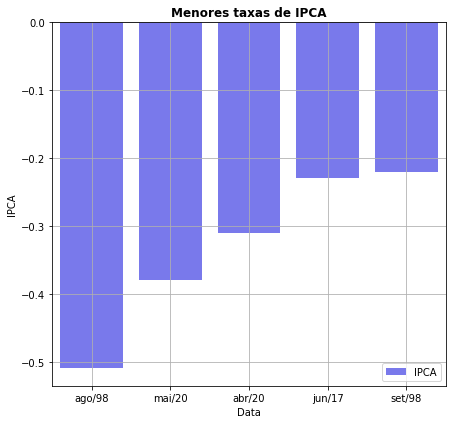

In [ ]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
sns.barplot(x=IPCAMin['Data'],y=IPCAMin['IPCA'],color='b',label='IPCA',alpha=0.6)
plt.title('Menores taxas de IPCA',fontsize=12,weight='bold')
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

**Quais as cinco maiores taxas de IPCA no período?**

In [ ]:
# As cinco maiores taxas de inflação
IPCAMax = inflacao.nlargest(5,'IPCA')
IPCAMax

,Data,IPCA,IPCA_Servico
29,jun/94,47.43,43.79
28,mai/94,44.03,45.42
26,mar/94,42.75,43.95
27,abr/94,42.68,41.83
24,jan/94,41.31,42.08


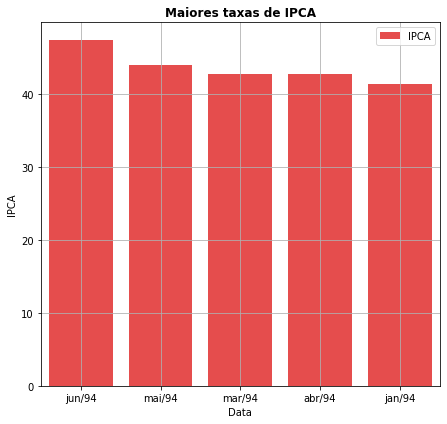

In [ ]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
sns.barplot(x=IPCAMax['Data'],y=IPCAMax['IPCA'],color='r',label='IPCA',alpha=0.8)
plt.title('Maiores taxas de IPCA',fontsize=12,weight='bold')
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

In [ ]:
# IPCA > 10%
IPCA_10 = inflacao[inflacao.IPCA > 10.0][['Data','IPCA', 'IPCA_Servico']]
IPCA_10.sort_values(by=['IPCA'],ascending=False)

,Data,IPCA,IPCA_Servico
29,jun/94,47.43,43.79
28,mai/94,44.03,45.42
26,mar/94,42.75,43.95
27,abr/94,42.68,41.83
24,jan/94,41.31,42.08
25,fev/94,40.27,41.38
23,dez/93,36.84,33.85
20,set/93,35.69,36.36
22,nov/93,35.56,33.01
21,out/93,33.92,32.08


**Quantas vezes o IPCA superou os 10%?**

In [ ]:

print (f'De fev/1992 até jan/2022 tivemos o IPCA acima de 10%:{len(IPCA_10): .0f} vezes')

De fev/1992 até jan/2022 tivemos o IPCA acima de 10%: 30 vezes


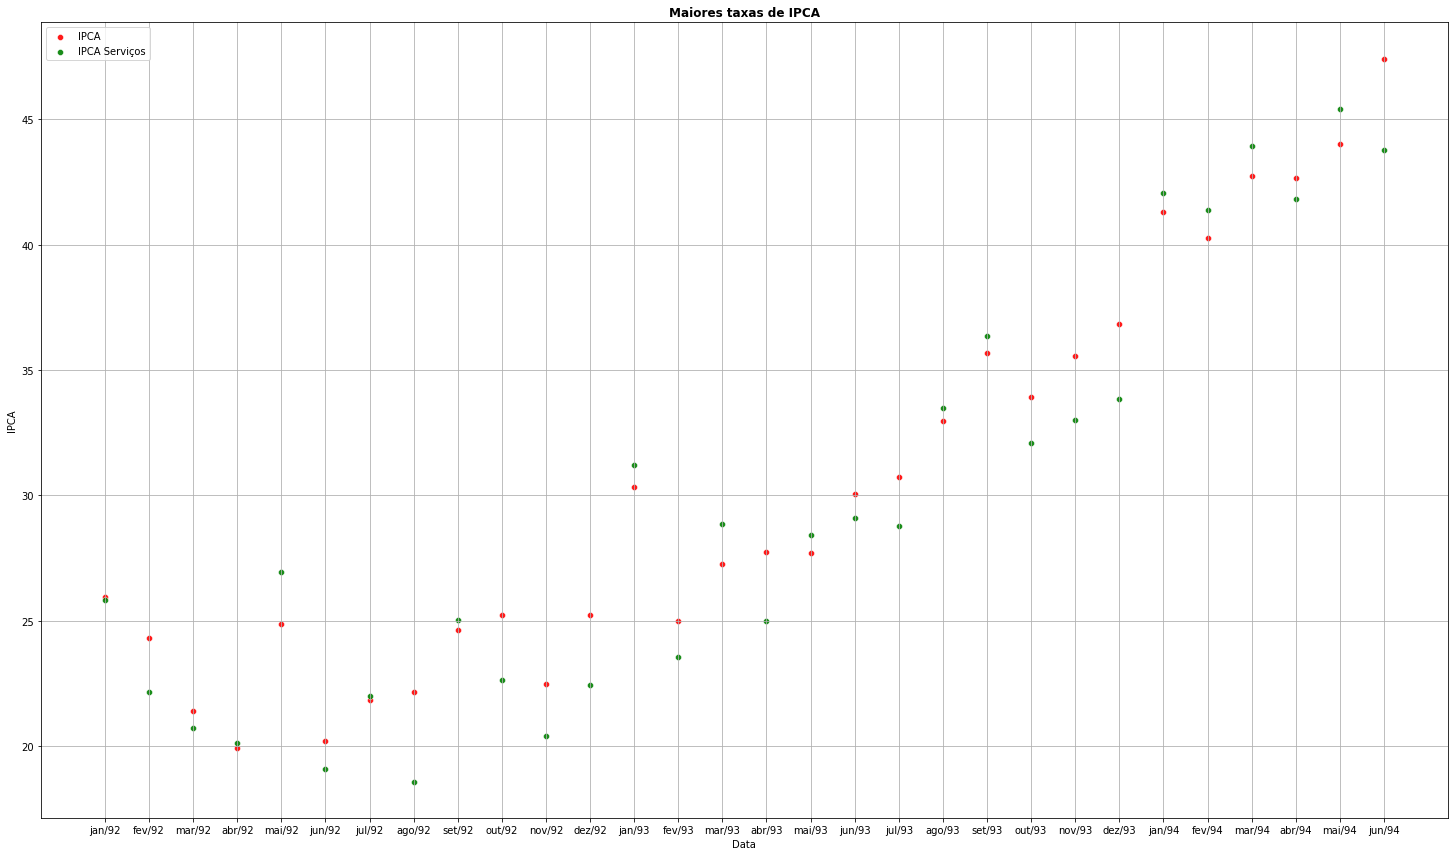

In [ ]:
plt.figure(figsize=(40,12))
plt.subplot(1,2,1)
sns.scatterplot(x=IPCA_10['Data'],y=IPCA_10['IPCA'],color='r',label='IPCA',alpha=0.9)
sns.scatterplot(x=IPCA_10['Data'],y=IPCA_10['IPCA_Servico'],color='g',label='IPCA Serviços',alpha=0.9)

plt.title('Maiores taxas de IPCA',fontsize=12,weight='bold')
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

In [ ]:
len(IPCA_10)

30

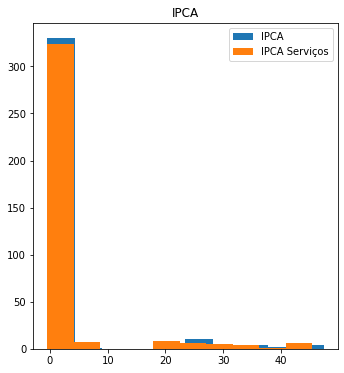

In [ ]:
# histograma
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.hist(inflacao.IPCA, label = 'IPCA')
plt.hist(inflacao.IPCA_Servico, label = 'IPCA Serviços')
plt.title('IPCA')
plt.legend()
plt.show()